# [4주차] Basic Machine Learning(4)

---
# Lab 7-1) Application & Tips

# 1. Learning Rate
* model을 생성할 때 핵심적인 hyper parameter(모델링 시 사용자가 직접 세팅하는 값)
* Learning rate와 Gradient의 연관관계를 통해 최적의 학습 모델 값을 찾는다 -> cost가 최소가 되는 지점

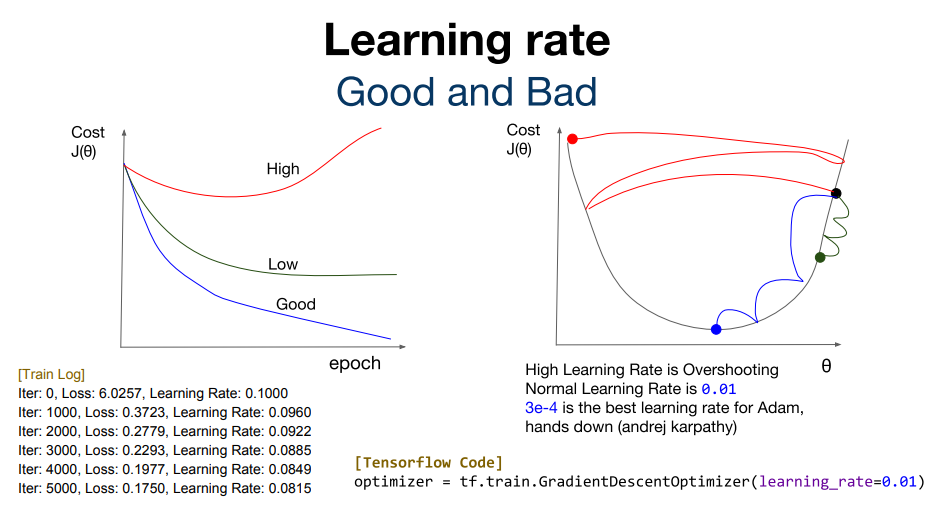

## Learning rate Decay
* 더 이상 학습이 되지 않는(cost가 떨어지지 않는) 상황에서 learning rate 값을 조절해줘서 cost를 떨어뜨린다.
* 주로 처음 시작할 때 learning rate 값을 크게 준 후 일정 epoch 주기로 값을 감소시킨다.

In [1]:
# python code
def exponential_decaay(epoch):
    starter_rate = 0.01
    k = 0.96
    exp_rate = starter_rate * exp(-k*t)
    return exp_rate

# 2. Data preprocessing (데이터 전처리)
## - Feature Scaling
* 표준화, 정규화 과정을 통해 불필요한 데이터를 제거하여 유용한 데이터만 남기는 과정
* 표준화: 평균에서부터 얼마나 떨어졌는지 판단 
* 정규화: 0~1 범위에서 데이터 분포를 나타낼 수 있음

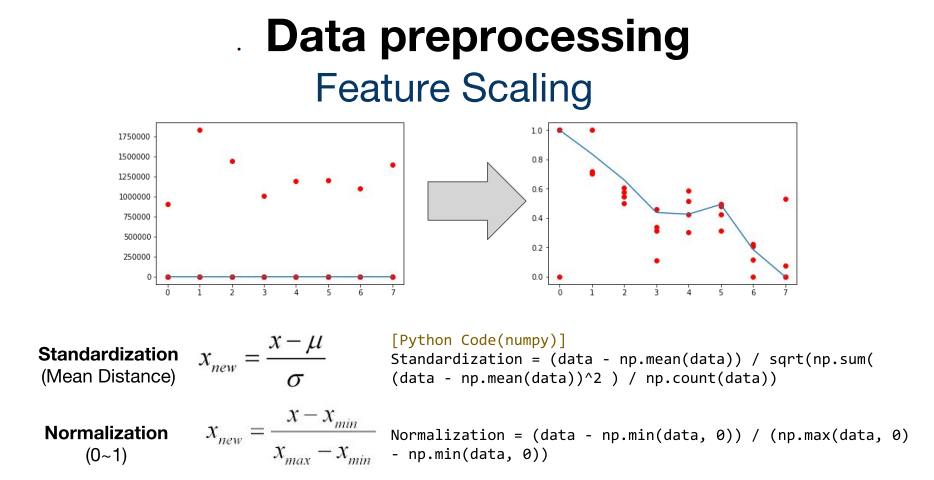

---
# Lab 7-2) Application & Tips

# 3. Overfitting
* 주어진 학습 데이터에 대한 validation, accuracy 값이 높게 나옴에도 실제 데이터에 적용할 때는 accuracy가 감소
* High bias (underfit): 학습이 덜 된 상태
* High variance (overfit): 주어진 학습 데이터에 과하게 적합한 상태 (일반적x)

## 해결 방법
## - Set a features
* Get more training data: 데이터를 추가 (high variance 해결)
* Smaller set of features: PCA 사용 (high variance 해결)
* Add additional features: hypothesis를 더 고도화 (high bias 해결)

---
# Code

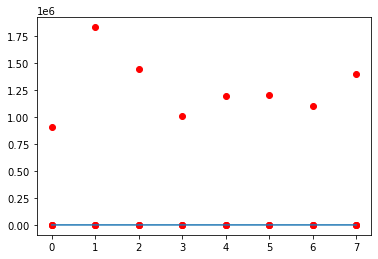

In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf

xy = np.array([[828.659973, 833.450012, 908100, 828.349976, 831.659973],
               [823.02002, 828.070007, 1828100, 821.655029, 828.070007],
               [819.929993, 824.400024, 1438100, 818.97998, 824.159973],
               [816, 820.958984, 1008100, 815.48999, 819.23999],
               [819.359985, 823, 1188100, 818.469971, 818.97998],
               [819, 823, 1198100, 816, 820.450012],
               [811.700012, 815.25, 1098100, 809.780029, 813.669983],
               [809.51001, 816.659973, 1398100, 804.539978, 809.559998]])

x_train = xy[:, 0:-1]
y_train = xy[:, [-1]]

plt.plot(x_train, 'ro')
plt.plot(y_train)
plt.show()

In [7]:
# 정규화를 통한 전처리
def normalization(data):
    numerator = data - np.min(data,0)
    denominator = np.max(data,0) - np.min(data,0)
    return numerator/denominator

xy = normalization(xy)

### 위 데이터를 기준으로 Linear Regression 모델을 만들자!

In [9]:
dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(len(x_train))

W = tf.Variable(tf.random.normal((4, 1)), dtype=tf.float32)
b = tf.Variable(tf.random.normal((1,)), dtype=tf.float32)

In [10]:
def linearReg_fn(features):
    hypothesis = tf.matmul(features, W) + b
    return hypothesis

def l2_loss(loss, beta=0.01):
    W_reg= tf.nn.l2_loss(W)
    loss= tf.reduce.mean(loss+W_reg*beta)
    return loss

def loss_fn(hypothesis, features, labels, flag = False):
    cost = tf.reduce_mean(tf.square(hypothesis - labels))
    if(flag):
        cost = l2_loss(cost)
    return cost

In [13]:
is_decay= True
starter_learning_rate=0.01

if(is_decay):    
    learning_rate = tf.keras.optimizers.schedules.ExponentialDecay(initial_learning_rate=starter_learning_rate, 
                                                                   decay_steps=50, decay_rate=0.96,staircase=True)
    optimizer = tf.keras.optimizers.SGD(learning_rate)
else:
    optimizer = tf.keras.optimizers.SGD(learning_rate=starter_learning_rate)
    
def grad(hypothesis, features, labels, l2_flag):
    with tf.GradientTape() as tape:
        loss_value = loss_fn(linearReg_fn(features),features,labels, l2_flag)
    return tape.gradient(loss_value, [W,b]), loss_value    

for step in range(EPOCHS):
    for features, labels  in dataset:
        features = tf.cast(features, tf.float32)
        labels = tf.cast(labels, tf.float32)
        grads, loss_value = grad(linearReg_fn(features), features, labels, False)
        optimizer.apply_gradients(grads_and_vars=zip(grads,[W,b]))        
    if step % 10 == 0:
        print("Iter: {}, Loss: {:.4f}".format(step, loss_value))

Iter: 0, Loss: nan
Iter: 10, Loss: nan
Iter: 20, Loss: nan
Iter: 30, Loss: nan
Iter: 40, Loss: nan
Iter: 50, Loss: nan
Iter: 60, Loss: nan
Iter: 70, Loss: nan
Iter: 80, Loss: nan
Iter: 90, Loss: nan
Iter: 100, Loss: nan


---
# Lab 7-3) Application & Tips

## Data sets
* Training data (학습)
* Validation data (평가)
* Test data (테스트)

## Anomoly Detection
Healthy Data로 학습 후 모델 생성 -> Unseen Data로 이상 케이스 감지

# Fashion MNIST (Image Classification)

In [14]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras

tf.random.set_seed(777)  # for reproducibility
print(tf.__version__)

2.10.0


In [15]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

4422102/4422102 [==============================] - 1s 0us/step


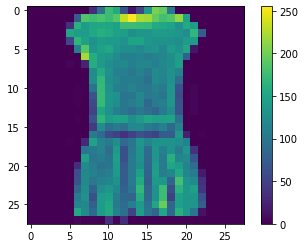

In [16]:
plt.figure()
plt.imshow(train_images[3])
plt.colorbar()
plt.grid(False)

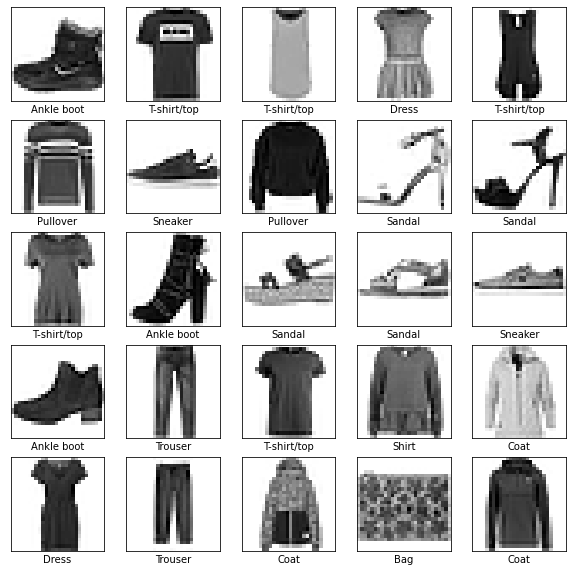

In [17]:
train_images = train_images / 255.0
test_images = test_images / 255.0

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

In [23]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [24]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5028 - accuracy: 0.8234
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3765 - accuracy: 0.8644
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3391 - accuracy: 0.8765
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3127 - accuracy: 0.8838
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2944 - accuracy: 0.8908


In [25]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.3603 - accuracy: 0.8753
Test accuracy: 0.8752999901771545
